In [184]:
# Import general

import pandas as pd
import numpy as np
import array as arr

# Import for GUI
import tkinter as tk

# Import for map
from matplotlib import pyplot
from matplotlib import colors
import pickle

# Import for Create Route
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Import for classes
from abc import ABC

# Import for Check Route
import copy

# Import for Create Pick
import random
from math import sqrt
from numpy import vectorize

# Import for CSV
from pathlib import Path


def m_SPF():

    map_SPF = np.ones((57, 165), dtype=int)

    for i in range(map_SPF.shape[1]):
        if (i % 2) == 0:
            map_SPF[:, i] = 0

    map_SPF[0, :] = 0  # Fila 0 vacia
    map_SPF[11:13, :] = 0  # Fila gruesa vacia
    map_SPF[30:32, :] = 0  # Fila gruesa vacia
    map_SPF[:, 160:165] = 0  # Columna gruesa final vacia
    map_SPF[53:57, 0:38] = 0  # Zona inferior izquierda vacia
    map_SPF[48:57, 38:42] = 0  #
    map_SPF[43:47, 42:57] = 0  #
    map_SPF[47:57, 43:55] = 1  # Hueco ocupado "exterior"
    map_SPF[48:57, 56:63] = 0  #
    map_SPF[48:50, 63:156] = 0  # Filas que separan la zona de recogida vacias
    map_SPF[48:57, 156:164] = 0  #
    map_SPF[50:57, 63:156] = 1  # Zona de recogida ocupada
    map_SPF[51, 7:10] = 0  # Hueco encima de una escalera
    # Huecos intercalados:
    map_SPF[16:20, 32:37] = 0  # Hueco a
    map_SPF[16:20, 58:63] = 0  # Hueco b
    map_SPF[16:20, 88:93] = 0  # Hueco e
    map_SPF[16:20, 114:119] = 0  # Hueco g
    map_SPF[16:20, 146:151] = 0  # Hueco i
    map_SPF[37:41, 32:37] = 0  # Hueco d
    map_SPF[37:41, 58:63] = 0  # Hueco c
    map_SPF[37:41, 88:93] = 0  # Hueco f
    map_SPF[37:41, 114:119] = 0  # Hueco h
    map_SPF[37:41, 146:151] = 0  # Hueco j
    # Escaleras:
    map_SPF[7:11, 10:12] = 1
    map_SPF[7:11, 38:40] = 1
    map_SPF[7:11, 74:76] = 1
    map_SPF[7:11, 90:92] = 1
    map_SPF[7:11, 118:120] = 1
    map_SPF[7:11, 154:156] = 1
    map_SPF[52:56, 7:10] = 1
    map_SPF[41:45, 38:40] = 1
    map_SPF[42:46, 118] = 1
    # Cuadrados azules derecha:
    map_SPF[2:4, 162:165] = 1
    map_SPF[22:24, 162:165] = 1
    map_SPF[38:40, 162:165] = 1
    map_SPF[53:55, 162:165] = 1
    # Cuadrados azules abajo:
    map_SPF[50:52, 40:43] = 1
    map_SPF[50:52, 56:59] = 1
    # Columnas verdes:
    map_SPF[16:18, 6:9] = 1
    map_SPF[16:18, 33:36] = 1
    map_SPF[16:18, 60:63] = 1
    map_SPF[16:18, 89:92] = 1
    map_SPF[16:18, 116:119] = 1
    map_SPF[16:18, 149:152] = 1
    map_SPF[38:40, 6:9] = 1
    map_SPF[38:40, 33:36] = 1
    map_SPF[38:40, 60:63] = 1
    map_SPF[38:40, 89:92] = 1
    map_SPF[38:40, 116:119] = 1
    map_SPF[38:40, 149:152] = 1

    map_list = map_SPF.tolist()

    colormap = colors.ListedColormap(["white", "grey"])
    pyplot.imshow(map_list, cmap=colormap)
    pyplot.show()

    map_array = map_SPF

    return map_array, map_list


# Función Generar Ruta con algoritmo A*

# https://www.analytics-link.com/post/2018/09/14/applying-the-a-path-finding-algorithm-in-python-part-1-2d-square-grid


def heuristic(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)


# path finding function


def generar_ruta(array, start, goal):
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    # (1,1),(-1,1),(1,-1),(-1,-1) Quitamos movimientos diagonales
    close_set = set()

    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}

    oheap = []
    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []

            while current in came_from:

                data.append(current)
                current = came_from[current]
            data = data + [start]
            data = data[::-1]
            print("Rutax", data)
            return data
        close_set.add(current)

        for i, j in neighbors:

            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:

                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue

                else:

                    # array bound y walls
                    continue

            else:

                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):

                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [
                i[1] for i in oheap
            ]:

                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

    return []



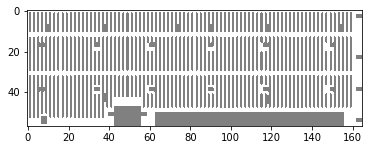

'x = map_list[31][31]\ny = map_list[52][14]\n\nprint(x)\nprint(y)\n\nprint(type(map_list))\nprint(type(map_array))\n\n# Llamada a la función de generar ruta\n\nstart = (31,31)\ngoal = (52, 14)\n\n\n\ndata = generar_ruta(map_array, start, goal)\n\nprint(data)\nprint(type(data))\nprint(type(start))'

In [185]:
# Llamar a map_SPF

map_array, map_list = m_SPF()

"""x = map_list[31][31]
y = map_list[52][14]

print(x)
print(y)

print(type(map_list))
print(type(map_array))

# Llamada a la función de generar ruta

start = (31,31)
goal = (52, 14)



data = generar_ruta(map_array, start, goal)

print(data)
print(type(data))
print(type(start))"""

In [186]:
def generar_pos(map_list, vmap, section = 0, demanda = 0):

    i = 0
    # i es el valor que establece si el vector es correcto o no 
    # 0: incorrecto, 1: Correcto

    while i == 0:

        if demanda == 0:    # Generación de posición con demanda baja (todo el almacén)
            num1 = random.randint(1, len(map_list)) - 2 # Valor random del eje x
            num2 = random.randint(1, len(map_list[0])) - 2 # Valor random del eje y

        elif demanda == 1:    # Generación de posición con demanda alta (un tercio del almacén)

            num1 = random.randint(1, len(map_list)) - 2
            leny3 = round(len(map_list[0])/3,0) # Hacemos esto para redondearlo a int para que no haya problema para ejecutar el random.randint

            if section == 1:
                num2 = random.randint(0, leny3) - 2 # Establece pedidos sólo en la parte izquierda del almacén
            elif section == 2:
                num2 = random.randint(leny3, 2*leny3) - 2 # Establece pedidos sólo en la parte central del almacén
            elif section == 3:
                num2 = random.randint(2*leny3, 3*leny3) - 2 # Establece pedidos sólo en la parte derecha del almacén

        # Se resta 2 a num1 y num2 para que no se excedan los límites de la matriz cuando se comprueban los cuadrados colindantes
        # Len te cuenta todos los números desde el 1, 
        # para que sea desde el [0] de la matriz se restaría 1 y para que no se exceda cuando se comprueba los cuadrados colindantes se resta 2

        x = 0 
        
        """x es el número de "0" que hay en las 9 posiciones contiguas a la
        selección. Si hay 4 o menos "0", la selección será válida
        (ya que no está en los pasillos). Si hay más de 4 "0" significa que
        está en un pasillo u otro espacio en el que no hay estantería"""

        # Comprueba las 9 casillas contiguas en las que hay "0"

        if vmap[num1 + 1, num2] == 0:
            x = x + 1

        if vmap[num1 + 1, num2 + 1] == 0:
            x = x + 1

        if vmap[num1, num2 + 1] == 0:
            x = x + 1

        if vmap[num1 - 1, num2 + 1] == 0:
            x = x + 1

        if vmap[num1 - 1, num2] == 0:
            x = x + 1

        if vmap[num1 - 1, num2 - 1] == 0:
            x = x + 1

        if vmap[num1, num2 - 1] == 0:
            x = x + 1

        # Comprueba que la posición está libre y hay 4 o menos casillas con "0"
        if x <= 4 and vmap[num1, num2] == 0:
            i = 1
            vector = np.array([num1, num2])

        # Caso en el que la selección no es válida
        if x > 4 or vmap[num1, num2] == 1:
            i = 0

    return (num1, num2)

In [187]:
# Llamar a generar pos

pos = generar_pos(map_list, map_array, 1, 1)

print(pos)
print(type(pos))

(42, 18)
<class 'tuple'>


In [188]:
def generar_pedido(picks, demanda):

    vec = []
    vec_ordenado = []

    if demanda == 0:    # Baja demanda. Los robots se mueven por todo el almacén

        for i in range(0, picks - 1):

            pos = generar_pos(map_list, map_array, 1, 1)  # Genera una posición aleatoria
            vec.append(pos)   # Añade la posición al vector de picks

    if demanda == 1: # Alta demanda. Los robots se mueven en tres secciones divididas del almacén
        section = random.randint(1, 3)

        for i in range(0, picks - 1):

            pos = generar_pos(map_list, map_array, 1, 1) # Genera una posición aleatoria dependiendo de demanda
            vec.append(pos)    # Añade la posición al vector de picks
       
    print("piasd", type(vec))

    vec_ordenado = ordenar_picks(vec)

    print("dasda", type(vec_ordenado))
    print("sdg", type(vec_ordenado[0]))

    return vec

    

def ordenar_picks(picks):
    picks_ordenados = []
    picks_ordenados.append(picks[0]) #Añado la posición del robot a la ruta
    picks.pop(0) #Comprobar si esto es correcto

    j = 0

    while len(picks) > 0:

        d_min = 100000

        for i in range (len(picks)):
            d = ((picks[i][0] - picks_ordenados[j][0]) ** 2 + (picks[i][1] - picks_ordenados[j][1]) ** 2)**0.5 
            #Calcula la distancia entre el pick actual y todos los que faltan por asignar para ver cual es el más cercano
            if d < d_min:
                d_min = d
                pos_min = picks[i]
                pos_min_index = i
        j = j + 1

        picks_ordenados.append(pos_min) #Añado el pick más cercano a la ruta
        picks.pop(pos_min_index) #Elimino el pick más cercano del vector de picks

    print("Picks ordenados", picks_ordenados)

    return picks_ordenados

In [189]:
# Llamar a generar pedido

pedido = generar_pedido(6, 1)

print(pedido)
print(type(pedido))


piasd <class 'list'>
Picks ordenados [(4, 18), (10, 8), (22, 36), (6, 46), (44, 4)]
dasda <class 'list'>
sdg <class 'tuple'>
[]
<class 'list'>
